## **Q1**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data=pd.read_csv("/content/lab_vehicle.csv")
data.head()

,COMPACTNESS,CIRCULARITY,'DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SCATTER RATIO',ELONGATEDNESS,'PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE_MAJOR','SCALED VARIANCE_MINOR','SCALED RADIUS OF GYRATION','SKEWNESS ABOUT_MAJOR','SKEWNESS ABOUT_MINOR','KURTOSIS ABOUT_MAJOR','KURTOSIS ABOUT_MINOR','HOLLOWS RATIO'
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


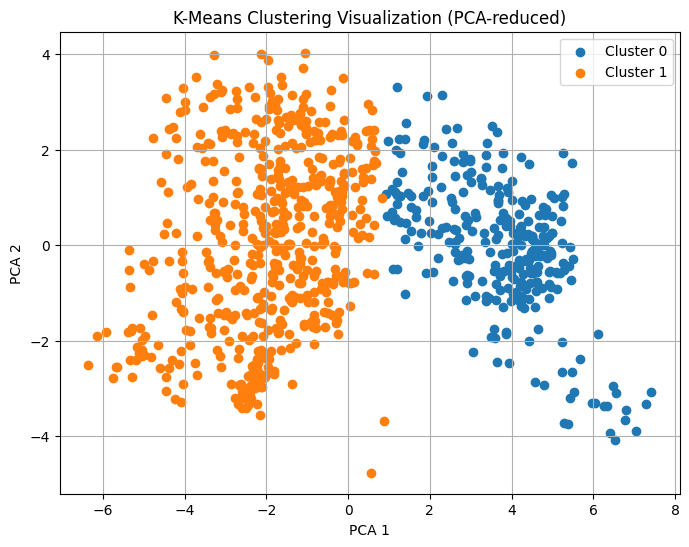

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# K-Means from scratch
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    return np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def kmeans(X, k=2, iterations=100):
    centroids = initialize_centroids(X, k)
    for _ in range(iterations):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

# Apply KMeans
k = 2
labels, centroids = kmeans(X_scaled, k=k)

# Visualize using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f"Cluster {i}")
plt.title("K-Means Clustering Visualization (PCA-reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()

##**Q2**

In [4]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def compute_inertia(X, labels, centroids):
    return np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in range(k)])

inertia = compute_inertia(X_scaled, labels, centroids)
sil_score = silhouette_score(X_scaled, labels)
ch_score = calinski_harabasz_score(X_scaled, labels)
db_score = davies_bouldin_score(X_scaled, labels)

print(f"Inertia (SSE): {inertia:.2f}")
print(f"Silhouette Score: {sil_score:.2f}")
print(f"Calinski-Harabasz Index: {ch_score:.2f}")
print(f"Davies-Bouldin Index: {db_score:.2f}")


Inertia (SSE): 8969.26
Silhouette Score: 0.39
Calinski-Harabasz Index: 588.94
Davies-Bouldin Index: 1.03


## **Q3**

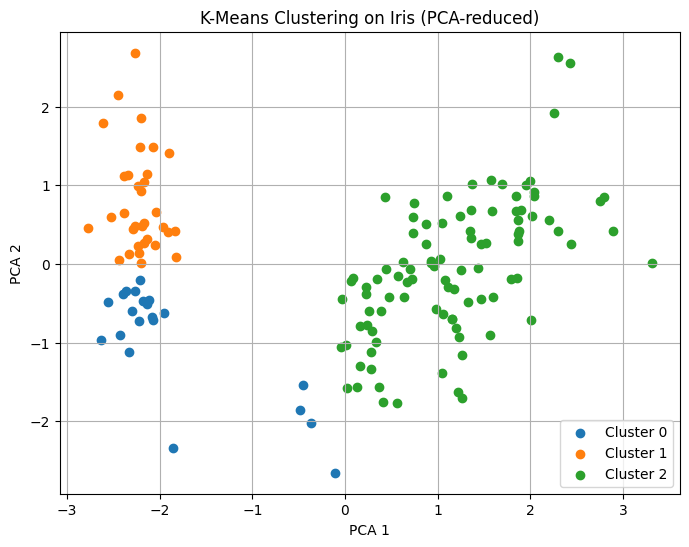

Evaluation Metrics on Iris:
Inertia: 40.76400414838727
Silhouette Score: 0.4798814508199817
Calinski-Harabasz: 157.36015312192248
Davies-Bouldin: 0.7893630242997912


In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = StandardScaler().fit_transform(iris.data)

labels_iris, centroids_iris = kmeans(X_iris, k=3)

# PCA
X_iris_pca = PCA(n_components=2).fit_transform(X_iris)
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_iris_pca[labels_iris == i, 0], X_iris_pca[labels_iris == i, 1], label=f"Cluster {i}")
plt.title("K-Means Clustering on Iris (PCA-reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()

# Metrics
print("Evaluation Metrics on Iris:")
print("Inertia:", compute_inertia(X_iris, labels_iris, centroids_iris))
print("Silhouette Score:", silhouette_score(X_iris, labels_iris))
print("Calinski-Harabasz:", calinski_harabasz_score(X_iris, labels_iris))
print("Davies-Bouldin:", davies_bouldin_score(X_iris, labels_iris))
